# Machine Predictive Maintenance

## Import Libraries

In [1]:
#import relevant libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load Data

In [2]:
df = pd.read_csv('/Users/chisimdirianyaogu/Downloads/Data Mining CA2/predictive_maintenance.csv')


In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
# rename columns with []
df = df.rename(columns={'Air temperature [K]': 'Air temperature', 'Process temperature [K]': 'Process temperature',
                        'Rotational speed [rpm]': 'Rotational speed', 'Torque [Nm]' : 'Torque', 'Tool wear [min]' : 'Tool wear'})


## Exploratory Data Analysis

In [5]:
df.shape

(10000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Product ID           10000 non-null  object 
 2   Type                 10000 non-null  object 
 3   Air temperature      10000 non-null  float64
 4   Process temperature  10000 non-null  float64
 5   Rotational speed     10000 non-null  int64  
 6   Torque               10000 non-null  float64
 7   Tool wear            10000 non-null  int64  
 8   Target               10000 non-null  int64  
 9   Failure Type         10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.isnull().sum()

UDI                    0
Product ID             0
Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Target                 0
Failure Type           0
dtype: int64

In [8]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature', 'Process temperature',
       'Rotational speed', 'Torque', 'Tool wear', 'Target', 'Failure Type'],
      dtype='object')

In [9]:
# check for duplicated rows
duplicated = df.duplicated().sum()
print('The number of duplicated rows are: {}'.format(duplicated))

The number of duplicated rows are: 0


In [10]:
# check the value counts for discrete variables
for column in df[['Type', 'Failure Type']]:
  columnseriesobj = df[column]
  print('unique values for {} : {}'.format(column,columnseriesobj.unique()))

unique values for Type : ['M' 'L' 'H']
unique values for Failure Type : ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [11]:
df['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [12]:
df_num = df[['Air temperature', 'Process temperature', 'Rotational speed', 'Torque']]
df_cat = df[['Type', 'Tool wear', 'Target', 'Failure Type']]

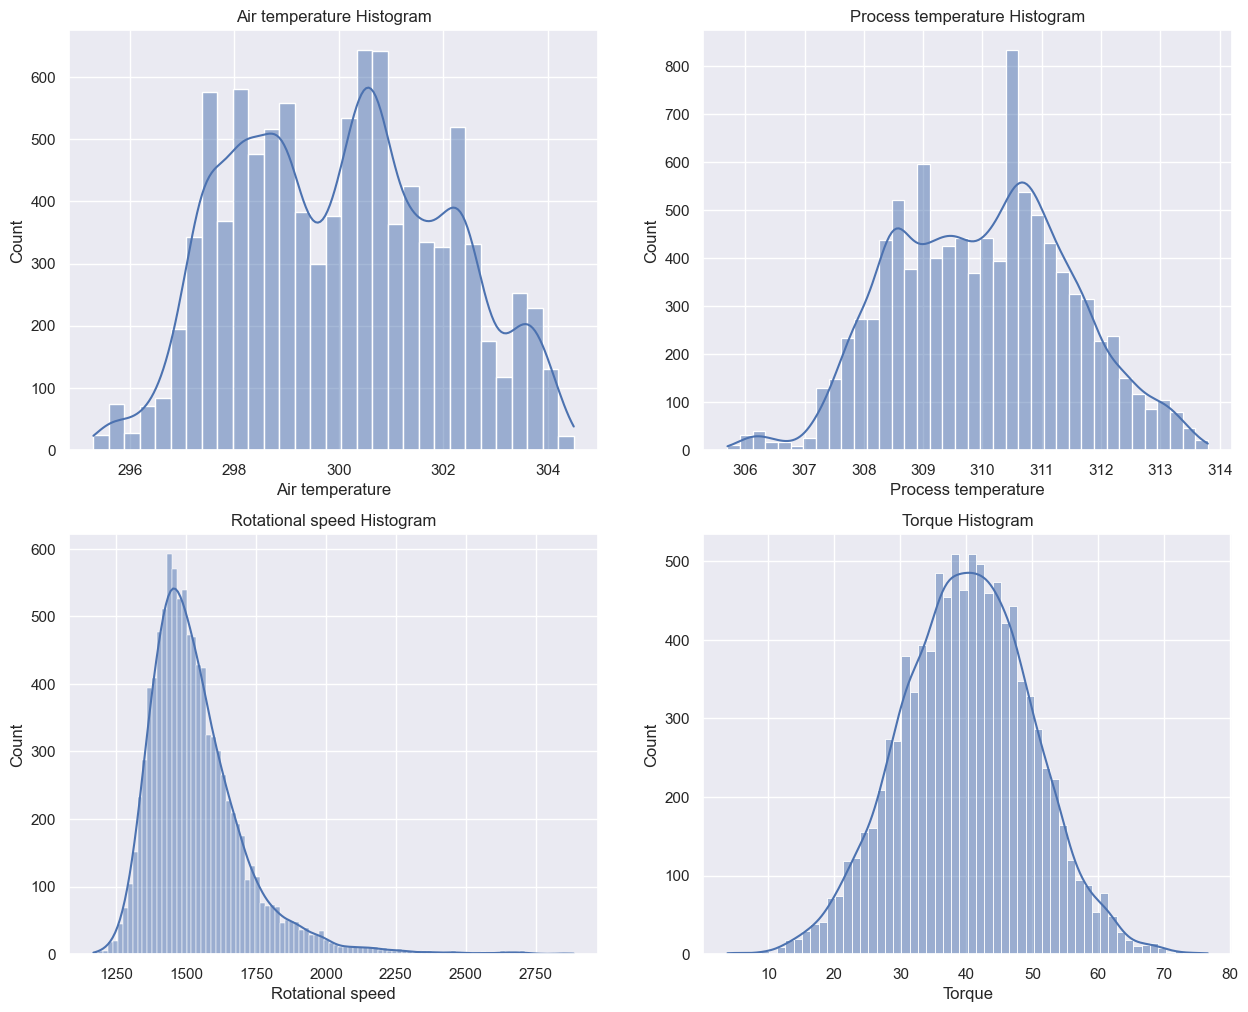

In [13]:
plt.figure(figsize=(15,12))
for i,col in enumerate(df_num.columns,1):
    plt.subplot(2,2,i)
    sns.histplot(df_num[col],kde=True)
    plt.title(col + ' Histogram')

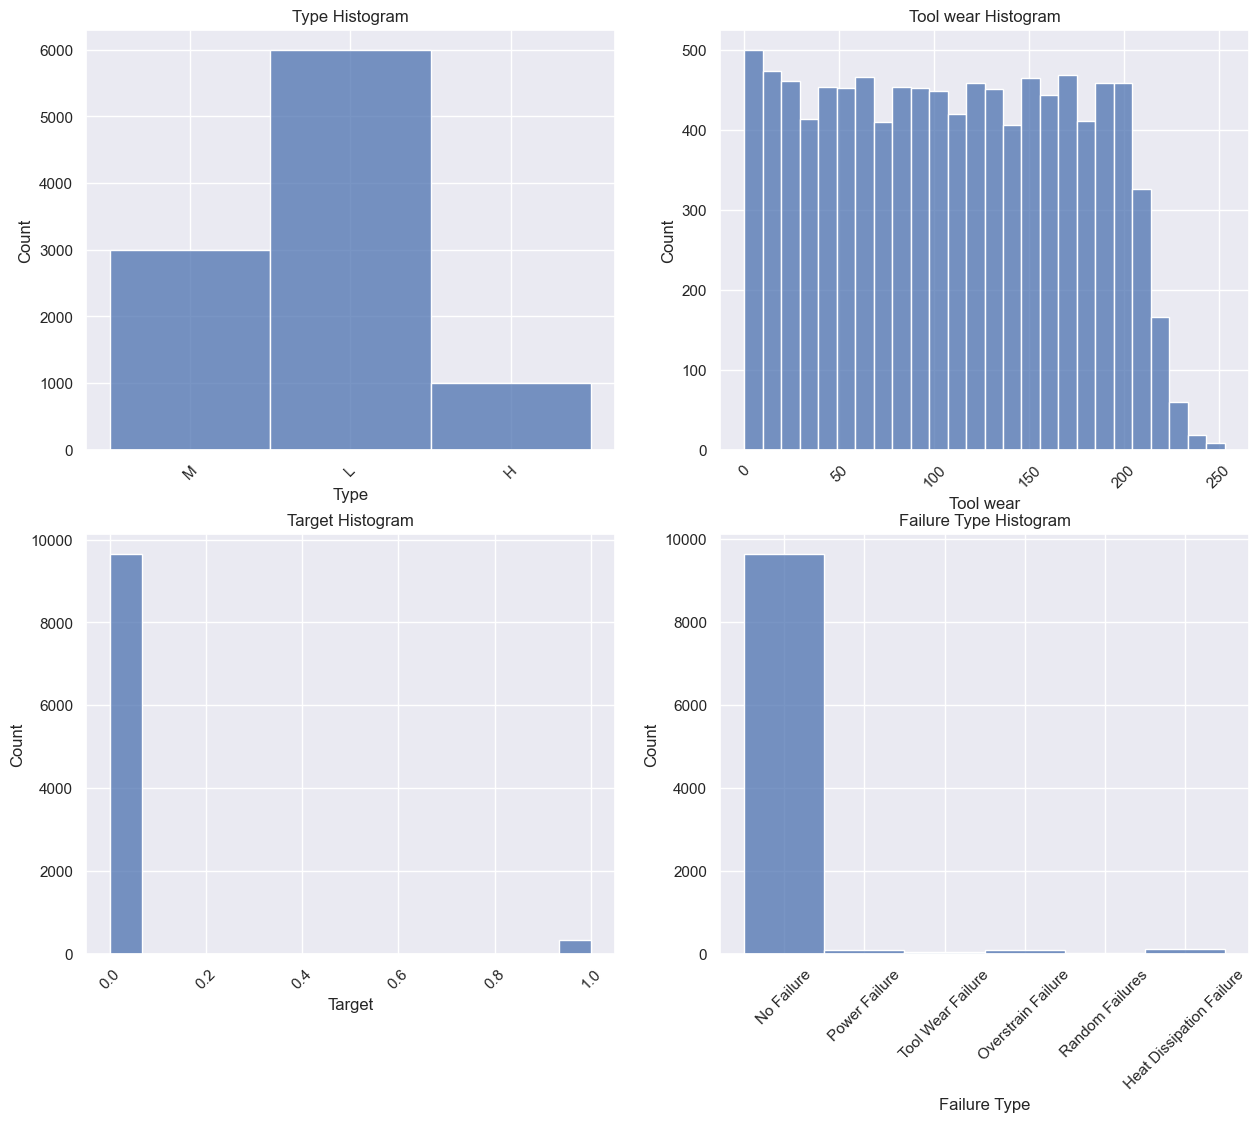

In [14]:
plt.figure(figsize=(15,12))
for i, col in enumerate(df_cat.columns,1):
    plt.subplot(2,2,i)
    sns.histplot(df_cat[col])
    plt.title(col + ' Histogram')
    plt.xticks(rotation=45)

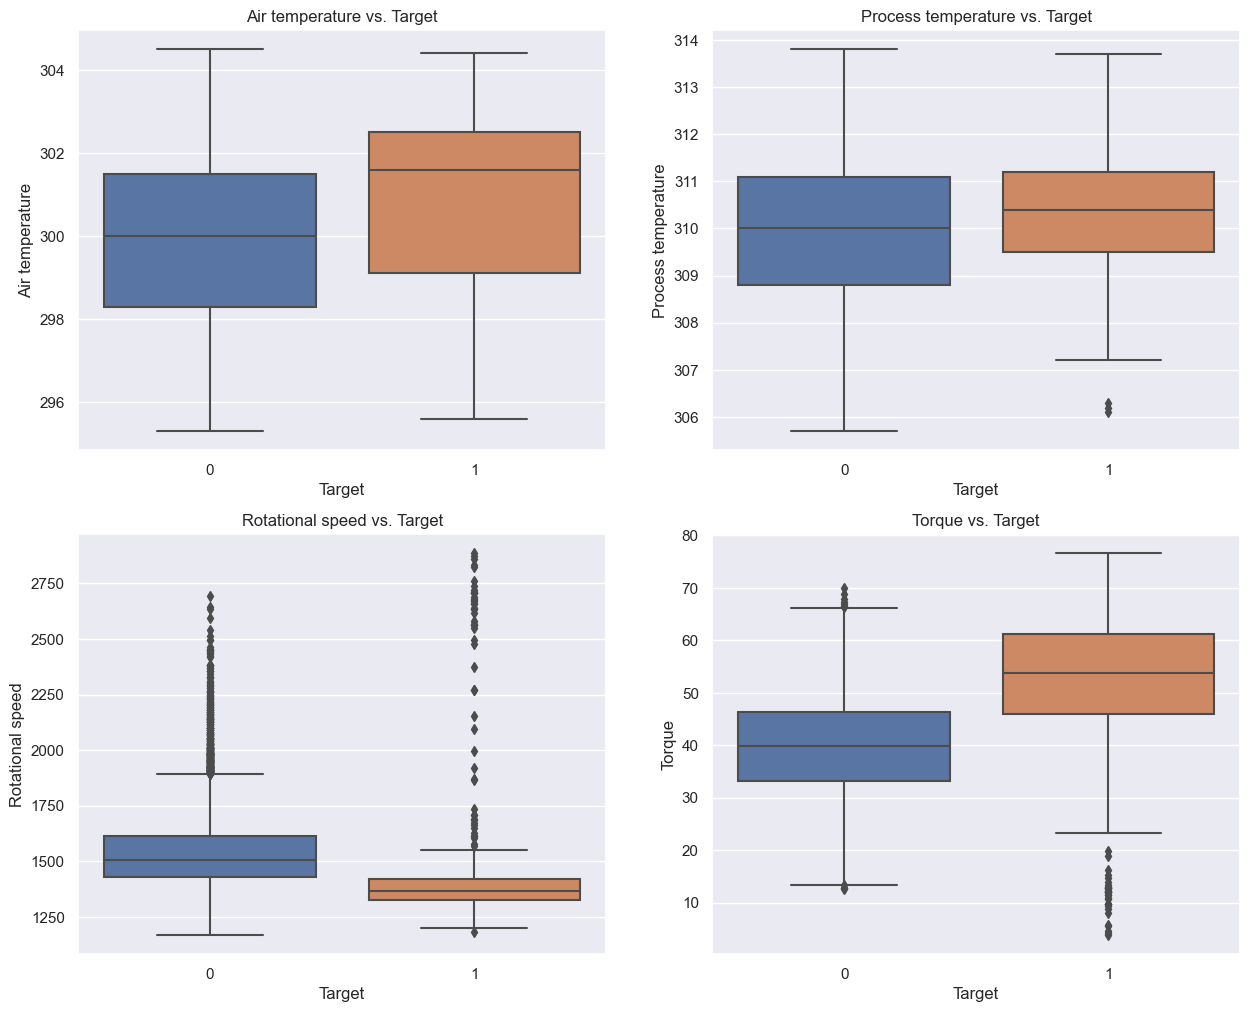

In [15]:
plt.figure(figsize=(15,12))
for i, col in enumerate(df_num.columns,1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df['Target'], y=df_num[col])
    plt.title(col + ' vs. Target')

In [16]:
X = df.drop(['UDI', 'Product ID', 'Failure Type', 'Target'], axis=1)
y = df['Target']

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# label encoder
X['Type'] = label_encoder.fit_transform(X['Type'])

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Use SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

In [19]:
# feature scaling with minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_resampled = pd.DataFrame(scaler.fit_transform(X_resampled),columns=X_resampled.columns.tolist())

In [20]:
y_resampled.value_counts()

Target
0    9661
1    9661
Name: count, dtype: int64

In [20]:
# Assuming X is your features and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

## Model Development and Evaluation

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

### Decision Trees

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model_dt = DecisionTreeClassifier(max_depth=10)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [39]:
y_pred_dt = model_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.9537691909608418
Precision: 0.9385847797062751
Recall: 0.9709944751381215


### Decision Trees with Tuned Hyper pararmeters

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 20), 'min_samples_split': range(2, 10),
               'min_samples_leaf': range(1, 10)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
best_max_depth = grid_search.best_params_['max_depth']

print(f'best min samples leaf :{best_min_samples_leaf}')
print(f'best min samples split: {best_min_samples_split}')
print(f'best max depth: {best_max_depth}')

best min samples leaf :1
best min samples split: 2
best max depth: 17


In [26]:
y_pred_dt = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
# Print the scores
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.9601518026565465
Precision: 0.9509306260575296
Recall: 0.9703038674033149


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2901
           1       0.95      0.97      0.96      2896

    accuracy                           0.96      5797
   macro avg       0.96      0.96      0.96      5797
weighted avg       0.96      0.96      0.96      5797

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2901
           1       0.95      0.97      0.96      2896

    accuracy                           0.96      5797
   macro avg       0.96      0.96      0.96      5797
weighted avg       0.96      0.96      0.96      5797



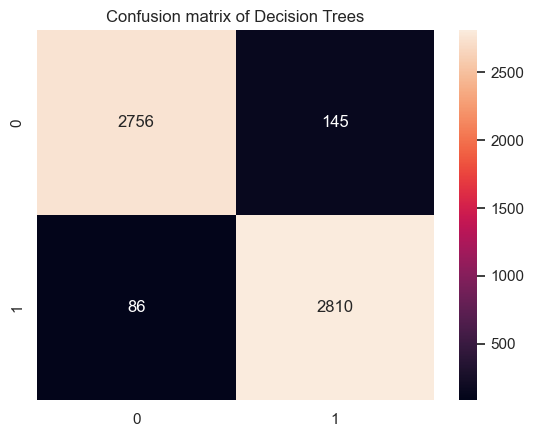

In [27]:
print(classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of Decision Trees') # fmt='d' formats the numbers as digits, which means integers
print(classification_report(y_test,y_pred_dt))

### Gradient Boosted Trees

In [28]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(objective='binary:logistic'
                              , seed=42).fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.9815421769880973
Precision: 0.971912013536379
Recall: 0.9917127071823204


### Gradient Boosted Trees with Tuned Hyper pararmeters

In [29]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

model_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=42)

grid_search_xgb = GridSearchCV(model_xgb, param_grid, 
                               scoring='accuracy', cv=5)
grid_search_xgb.fit(X_train, y_train)

best_params = grid_search_xgb.best_params_

best_model_xgb = xgb.XGBClassifier(objective='binary:logistic',
                                    seed=42, **best_params)
best_model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
# Print the scores
y_pred_xgb = best_model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.9829222011385199
Precision: 0.9745503902273498
Recall: 0.9917127071823204


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2901
           1       0.97      0.99      0.98      2896

    accuracy                           0.98      5797
   macro avg       0.98      0.98      0.98      5797
weighted avg       0.98      0.98      0.98      5797

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2901
           1       0.97      0.99      0.98      2896

    accuracy                           0.98      5797
   macro avg       0.98      0.98      0.98      5797
weighted avg       0.98      0.98      0.98      5797



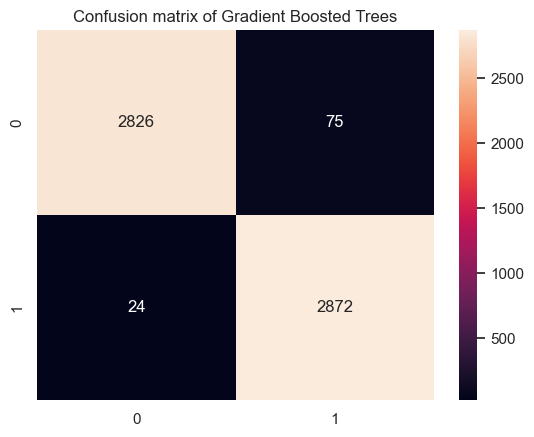

In [32]:
print(classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of Gradient Boosted Trees') # fmt='d' formats the numbers as digits, which means integers
print(classification_report(y_test,y_pred_xgb))

### Deep Learning

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

/Users/chisimdirianyaogu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/10
339/339 [==============================] - 1s 921us/step - loss: 0.3962 - accuracy: 0.8284 - val_loss: 0.2722 - val_accuracy: 0.8865
Epoch 2/10
339/339 [==============================] - 0s 705us/step - loss: 0.2501 - accuracy: 0.9001 - val_loss: 0.2298 - val_accuracy: 0.9065
Epoch 3/10
339/339 [==============================] - 0s 701us/step - loss: 0.2359 - accuracy: 0.9050 - val_loss: 0.2314 - val_accuracy: 0.9054
Epoch 4/10
339/339 [==============================] - 0s 894us/step - loss: 0.2305 - accuracy: 0.9100 - val_loss: 0.2300 - val_accuracy: 0.9054
Epoch 5/10
339/339 [==============================] - 0s 715us/step - loss: 0.2258 - accuracy: 0.9114 - val_loss: 0.2244 - val_accuracy: 0.9061
Epoch 6/10
339/339 [==============================] - 0s 728us/step - loss: 0.2305 - accuracy: 0.9077 - val_loss: 0.2385 - val_accuracy: 0.9009
Epoch 7/10
339/339 [==============================] - 0s 679us/step - loss: 0.2160 - accuracy: 0.9183 - val_loss: 0.2130 - val_accuracy:

In [34]:
# evaluate the model on the test set
y_pred = model.predict(X_test)
# convert probabilities to binary predictions
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

182/182 [==============================] - 0s 331us/step


In [35]:
# Print the scores
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.9244436777643609
Precision: 0.9096666666666666
Recall: 0.9423342541436464


              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2901
           1       0.91      0.94      0.93      2896

    accuracy                           0.92      5797
   macro avg       0.92      0.92      0.92      5797
weighted avg       0.92      0.92      0.92      5797

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2901
           1       0.91      0.94      0.93      2896

    accuracy                           0.92      5797
   macro avg       0.92      0.92      0.92      5797
weighted avg       0.92      0.92      0.92      5797



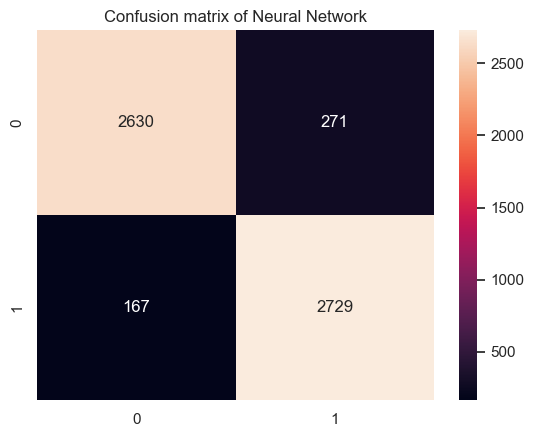

In [37]:
print(classification_report(y_test, y_pred_binary))
cm = confusion_matrix(y_test,y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of Neural Network') # fmt='d' formats the numbers as digits, which means integers
print(classification_report(y_test,y_pred_binary))